In [1]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.integrate
import pandas as pd

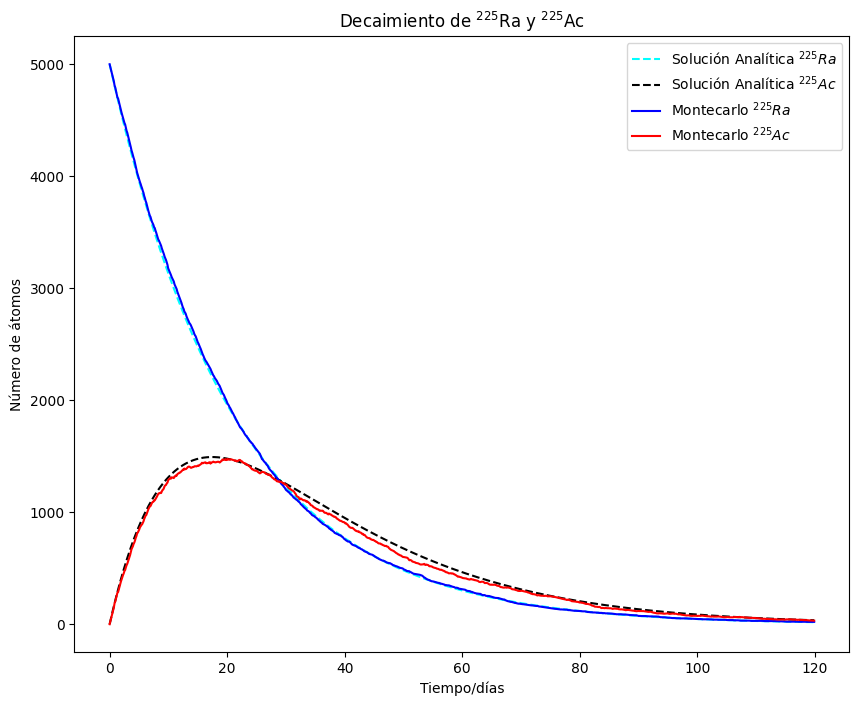

In [2]:

#PERFORMANCE
#Ex: número de átomos iniciales=100000
#Con for: 2 min 9.8 s
#Con pandas: 5.9 s

# DEFINIMOS VARIABLES NECESARIAS
random.seed(1) # semilla inicial
radium_atom_init=5000 # num de átomos iniciales de Ra
actinium_atom_init=0  # num de átomos iniciales de Ac
n_points = 1000 # num de úntos en el tiempo 
time_end=120 # tiempo final
t_half_radium=14.8 # Tiempo de vida medio Ra
t_half_actinium=10.0 # Tiempo de vida medio Ac
λ_radium= np.log(2)/t_half_radium #  constante de decaimineto Ra
λ_actinium= np.log(2)/t_half_actinium # constante de decaimineto Ac
atoms= np.ones((radium_atom_init)) # Array de átomos iniciales

# Definimos la probabilidad de decaiminto del Ra y Ac
p_decay_radium    = 1 - np.exp(-(time_end/n_points) / t_half_radium * np.log(2)) # Radium
p_decay_actinium    = 1 - np.exp(-(time_end/n_points) / t_half_actinium * np.log(2)) # Actinium

# Rango de tiempo con pequeñas particiones 
time_range = np.arange(0, time_end, time_end/n_points)

#CREAMOS DATAFRAME
df=pd.DataFrame({"time":time_range})

# Salución Analítica
#Ra
df=df.assign(sol_a_radium=lambda x: (radium_atom_init * \
                                     np.exp (-x["time"]/t_half_radium * np.log(2))))
#Ac
df=df.assign(sol_a_actinium=lambda x: ((λ_radium/(λ_actinium-λ_radium))*radium_atom_init*( np.exp(-x["time"]*λ_radium)  \
                                                             -np.exp(-x["time"]*λ_actinium))+\
                                                                  actinium_atom_init*np.exp(-x["time"]*λ_actinium)))
#Función que calcula el número de átomos
#1:Ra
#2:Ac
#3: Beta

def num_atom(x):
    if x.time==0:
        return [(atoms == 1).sum(),(atoms == 2).sum()]
    else:
        atoms[(atoms==1) &(np.random.rand(radium_atom_init)<= p_decay_radium)]=2
        atoms[(atoms==2) &(np.random.rand(radium_atom_init)<= p_decay_actinium)]=3
        return [(atoms == 1).sum(),(atoms == 2).sum()]
    
#Adiciona el resultado al df
df[["N_radium","N_actinium"]]=df.apply(num_atom,axis=1, result_type='expand')

#Plot

plt.figure(figsize=(10,8))
plt.plot(df["time"],df["sol_a_radium"], label = 'Solución Analítica $^{225}Ra$', color = 'cyan', linestyle = '--')
plt.plot(df["time"], df["sol_a_actinium"], label = 'Solución Analítica $^{225}Ac$', color = 'black', linestyle = '--')
plt.plot(df["time"],df["N_radium"],label = 'Montecarlo $^{225}Ra$', color = 'blue')
plt.plot(df["time"],df["N_actinium"],label = 'Montecarlo $^{225}Ac$', color = 'red')
plt.title('Decaimiento de $^{225}$Ra y $^{225}$Ac')
plt.ylabel('Número de átomos')
plt.xlabel('Tiempo/días')
plt.legend(loc='upper right') 
plt.show()